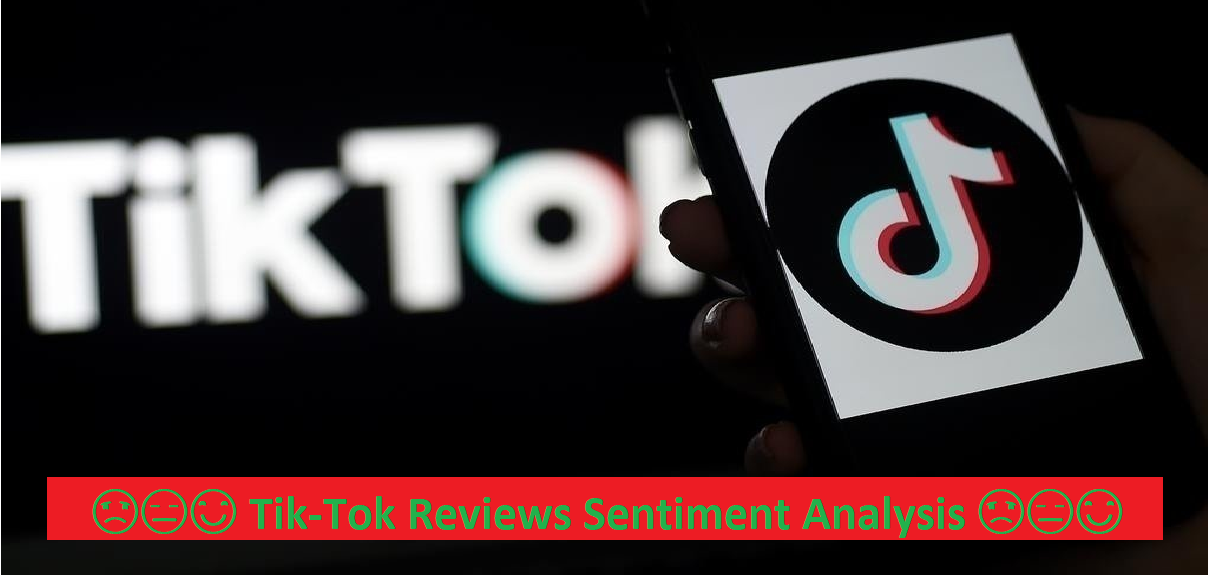

### Import required library

In [1]:
import warnings
warnings.filterwarnings('ignore')
import pandas as pd
import numpy as np
import plotly.express as px
import matplotlib.pyplot as plt

import nltk
from nltk.corpus import stopwords
import string
import re
from wordcloud import WordCloud, STOPWORDS

from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier

### Load & read the data

In [2]:
pd.options.display.max_colwidth=1000000

Dataset link: 'https://www.kaggle.com/datasets/shivkumarganesh/tiktok-google-play-store-review'

In [3]:
df=pd.read_csv('D:\\PGP IN DATA SCIENCE with Careerera\\Data Sets\\NLP Dataset\\tiktok_google_play_reviews.csv')
df.head()

reviewId              userName  \
0  68ccaec8-1415-4301-a85e-3004679a3a83          Cassie Moore   
1  d84cbfd3-6aa3-485c-aaf9-c5dca27dc966         Kaleb Plummer   
2  96618aa1-31e5-4259-8649-89b75d962f00           Rylee Maher   
3  078c0bda-598b-474e-a04e-d7cb3e6f6301  Kittykatelyn Romilly   
4  8e68c5cd-b12a-4206-a8da-6bfdbff44ae3      Loveness Malenga   

                                                                                  userImage  \
0   https://play-lh.googleusercontent.com/a/ALm5wu3q5toVgi31gp1EalLMYGYr9L5RfXVIpzLsxbkn=mo   
1  https://play-lh.googleusercontent.com/a-/ACNPEu-2grjqlhIhMFobZYFRDx9RuuKmHuLWbqns_QM8yDM   
2   https://play-lh.googleusercontent.com/a/ALm5wu1DMx5VEEGE6_xtG-vZJAE3dKMJzrewnOSxJxqn=mo   
3   https://play-lh.googleusercontent.com/a-/ACNPEu9k9OidlJrJIdMlenCtAQKwdkXGBgDzM0B5xoDhxA   
4     https://play-lh.googleusercontent.com/a-/ACNPEu-ED4DqjcPGcbwEnqI1TGoraxTu7nOsegt5SaBE   

                                                                                                                                                                                                                                                                                                                                                                                content  \
0                                                                                                                                                                                                                                                                                                                                                                              No words   
1                                                                                                                                                                                                                                                                                                                                                                 Great fun app so far!   
2  The app would get a higher rating but I literally can't sign in. The second I open the app and try to tap either the sign in or sign up or literally anything the screen completely freezes and I can't do anything. I've uninstalled the app, restarted my phone, and nothing is fixing it. I don't know if its just my phone or if this is a new problem but that's my experience.   
3                                                                                                                                                                                                                                                                                                                       I WISH I COULD GIVE THIS A 100 PERCENT RATING I LOVE THIS!! 💕 😘   
4                                                                                                                                                                                                                                                                                                                                                                   Pictures and record   

   score  thumbsUpCount reviewCreatedVersion                   at  \
0      5              0               27.1.3  2022-11-29 21:55:37   
1      5              0                  NaN  2022-11-29 21:55:04   
2      1              0               27.1.3  2022-11-29 21:54:48   
3      5              0                  NaN  2022-11-29 21:54:35   
4      5              0                  NaN  2022-11-29 21:54:21   

  replyContent repliedAt  
0          NaN       NaN  
1          NaN       NaN  
2          NaN       NaN  
3          NaN       NaN  
4          NaN       NaN

In [4]:
df.shape

(460287, 10)

In [5]:
df.size

4602870

In [6]:
df.columns

Index(['reviewId', 'userName', 'userImage', 'content', 'score',
       'thumbsUpCount', 'reviewCreatedVersion', 'at', 'replyContent',
       'repliedAt'],
      dtype='object')

In [7]:
df.dtypes

reviewId                object
userName                object
userImage               object
content                 object
score                    int64
thumbsUpCount            int64
reviewCreatedVersion    object
at                      object
replyContent            object
repliedAt               object
dtype: object

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 460287 entries, 0 to 460286
Data columns (total 10 columns):
 #   Column                Non-Null Count   Dtype 
---  ------                --------------   ----- 
 0   reviewId              460287 non-null  object
 1   userName              460287 non-null  object
 2   userImage             460287 non-null  object
 3   content               460271 non-null  object
 4   score                 460287 non-null  int64 
 5   thumbsUpCount         460287 non-null  int64 
 6   reviewCreatedVersion  333953 non-null  object
 7   at                    460287 non-null  object
 8   replyContent          260 non-null     object
 9   repliedAt             260 non-null     object
dtypes: int64(2), object(8)
memory usage: 35.1+ MB


### Missing value

In [9]:
df.isna().sum()

reviewId                     0
userName                     0
userImage                    0
content                     16
score                        0
thumbsUpCount                0
reviewCreatedVersion    126334
at                           0
replyContent            460027
repliedAt               460027
dtype: int64

#### To analyze TikTok reviews, we only need two columns, content and score and hence drop null rows in content column only

In [10]:
data=df[['content','score']]
data.dropna(inplace=True)
data.isna().sum()

content    0
score      0
dtype: int64

In [11]:
data.head()

content  \
0                                                                                                                                                                                                                                                                                                                                                                              No words   
1                                                                                                                                                                                                                                                                                                                                                                 Great fun app so far!   
2  The app would get a higher rating but I literally can't sign in. The second I open the app and try to tap either the sign in or sign up or literally anything the screen completely freezes and I can't do anything. I've uninstalled the app, restarted my phone, and nothing is fixing it. I don't know if its just my phone or if this is a new problem but that's my experience.   
3                                                                                                                                                                                                                                                                                                                       I WISH I COULD GIVE THIS A 100 PERCENT RATING I LOVE THIS!! 💕 😘   
4                                                                                                                                                                                                                                                                                                                                                                   Pictures and record   

   score  
0      5  
1      5  
2      1  
3      5  
4      5

### Text Preprocessing

In [12]:
stemmer = nltk.SnowballStemmer("english")

In [13]:
stopword=set(stopwords.words('english'))
len(stopword)

179

In [14]:
def clean(text):
    text = str(text).lower()
    text = re.sub('\[.*?\]', '', text)
    text = re.sub('https?://\S+|www\.\S+', '', text)
    text = re.sub('<.*?>+', '', text)
    text = re.sub('[%s]' % re.escape(string.punctuation), '', text)
    text = re.sub('\n', '', text)
    text = re.sub('\w*\d\w*', '', text)
    text = [word for word in text.split(' ') if word not in stopword]
    text=" ".join(text)
    text = [stemmer.stem(word) for word in text.split(' ')]
    text=" ".join(text)
    return text

In [15]:
data["content"] = data["content"].apply(clean)
data.head()

content  \
0                                                                                                                                                                                                            word   
1                                                                                                                                                                                               great fun app far   
2  app would get higher rate liter cant sign second open app tri tap either sign sign liter anyth screen complet freez cant anyth ive uninstal app restart phone noth fix dont know phone new problem that experi   
3                                                                                                                                                                          wish could give  percent rate love 💕 😘   
4                                                                                                                                                                                                   pictur record   

   score  
0      5  
1      5  
2      1  
3      5  
4      5

In [16]:
scores=data['score'].value_counts()
scores

5    338884
1     61926
4     27664
3     18618
2     13179
Name: score, dtype: int64

In [17]:
fig=px.pie(scores,
          labels=scores.index,
          values=scores.values,
          hole=0.5, names=scores.index,
          title="Ratings Count on Playstore")
fig.show()

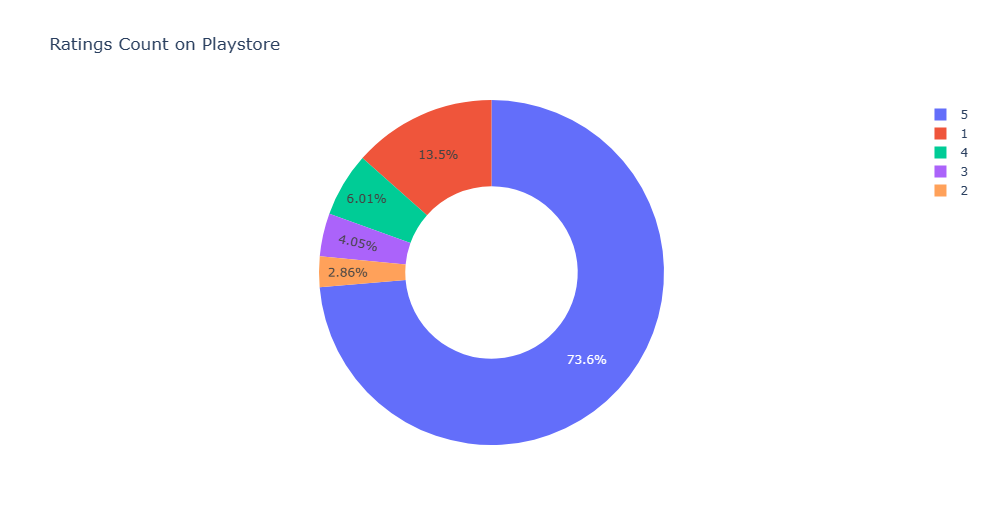

**73.6% ratings are % star, 6% are 4 star, 4% are 3 star, 3% are 2 star & 13.5% are 1 Star ratings.**

### Replacing scores with Sentiments positive, negative and neutral

In [18]:
def sentiment_class(score):
    if score==5:
        return 'positive'
    elif score>=3 and score <=4:
        return 'neutral'
    else:
        return 'negative'
    
data['Sentiment_class']=data['score'].apply(sentiment_class)
data.head()

content  \
0                                                                                                                                                                                                            word   
1                                                                                                                                                                                               great fun app far   
2  app would get higher rate liter cant sign second open app tri tap either sign sign liter anyth screen complet freez cant anyth ive uninstal app restart phone noth fix dont know phone new problem that experi   
3                                                                                                                                                                          wish could give  percent rate love 💕 😘   
4                                                                                                                                                                                                   pictur record   

   score Sentiment_class  
0      5        positive  
1      5        positive  
2      1        negative  
3      5        positive  
4      5        positive

In [19]:
sents=data['Sentiment_class'].value_counts()
sents

positive    338884
negative     75105
neutral      46282
Name: Sentiment_class, dtype: int64

In [20]:
fig=px.pie(sents,
          labels=sents.index,
          values=sents.values,
          hole=0.5, names=sents.index,
          title="Sentiment Class Count")
fig.show()

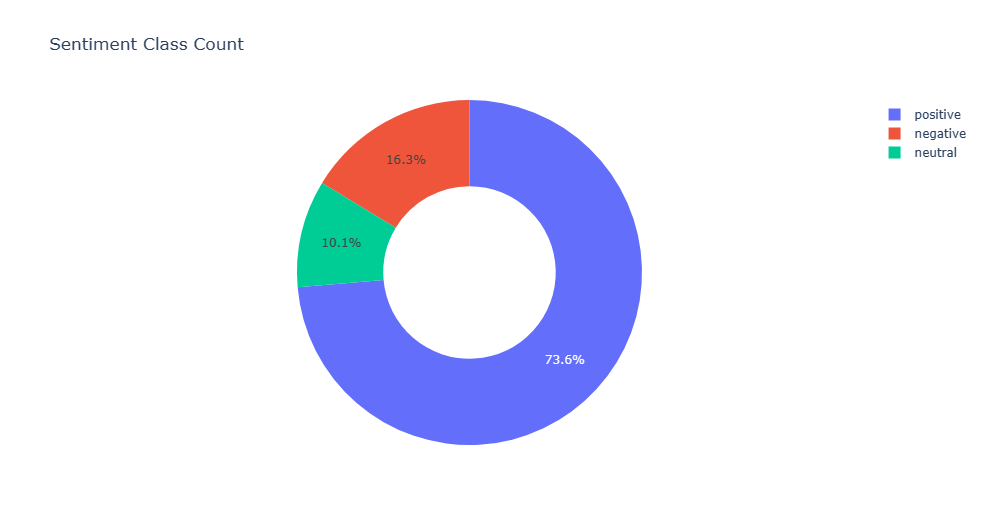

**Over 73% reviews are positive, 10% are neutral & 16% are negative reviews.**

### Plot positive sentiment words

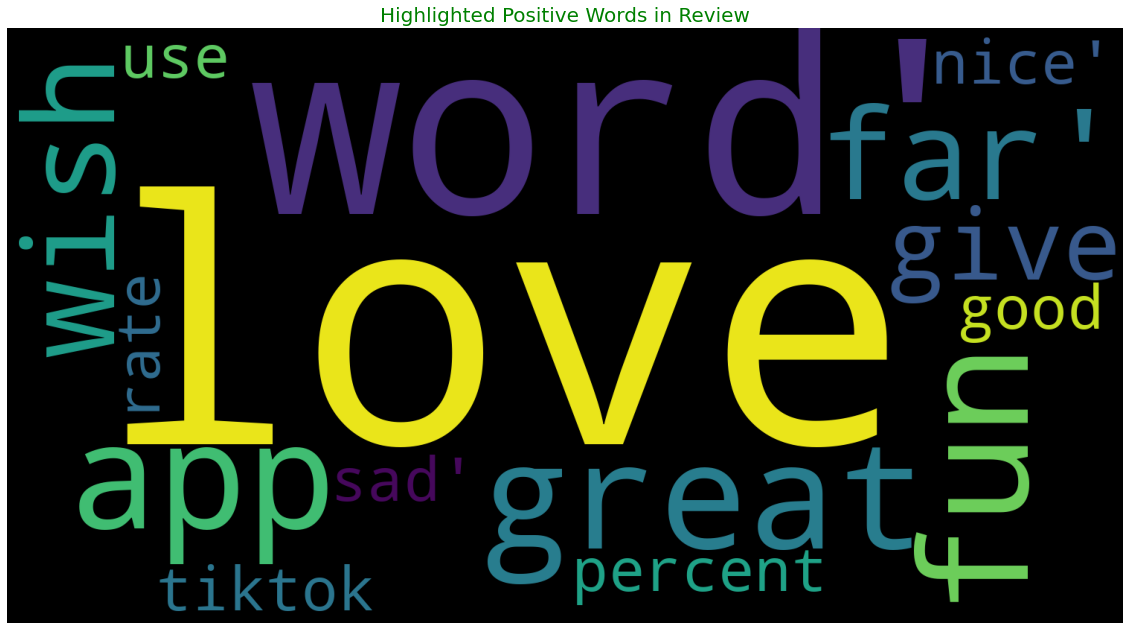

In [22]:
graph=data[data['Sentiment_class']=='positive']
review=graph['content'].values
word_cloud=WordCloud(max_words=50000, width=1500,height=800).generate_from_text(str(review))
plt.figure(figsize=(20,12))
plt.imshow(word_cloud)
plt.title("Highlighted Positive Words in Review", color='green', fontsize=20)
plt.axis('off');

### Plot Neutral sentiment words

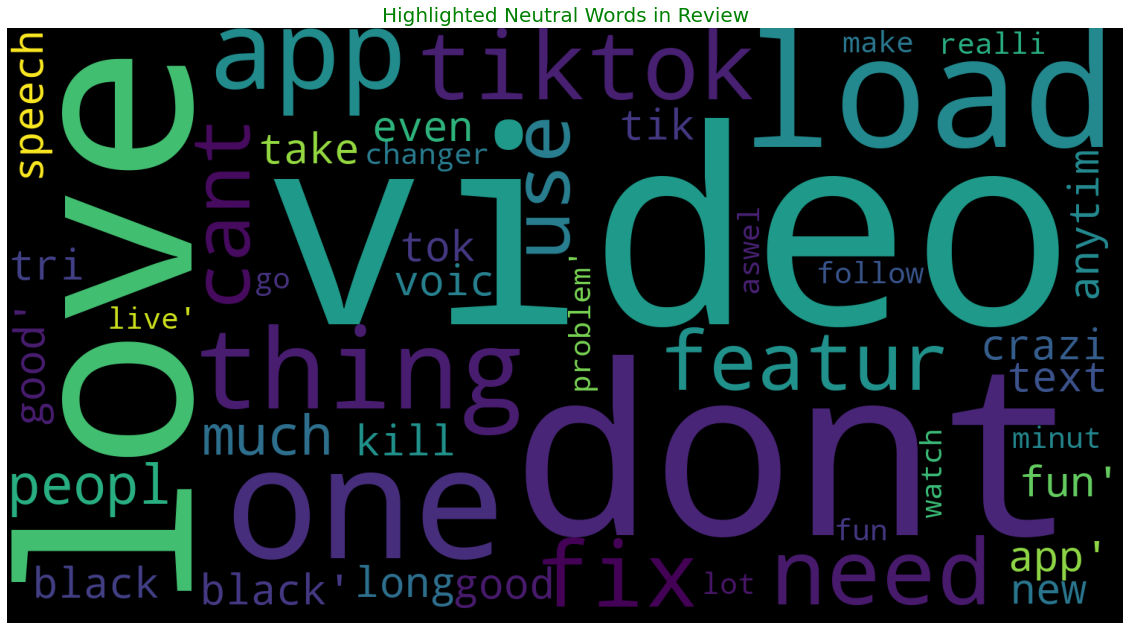

In [23]:
graph=data[data['Sentiment_class']=='neutral']
review=graph['content'].values
word_cloud=WordCloud(max_words=50000, width=1500,height=800).generate_from_text(str(review))
plt.figure(figsize=(20,12))
plt.imshow(word_cloud)
plt.title("Highlighted Neutral Words in Review", color='green', fontsize=20)
plt.axis('off');

### Plot Negative sentiment words

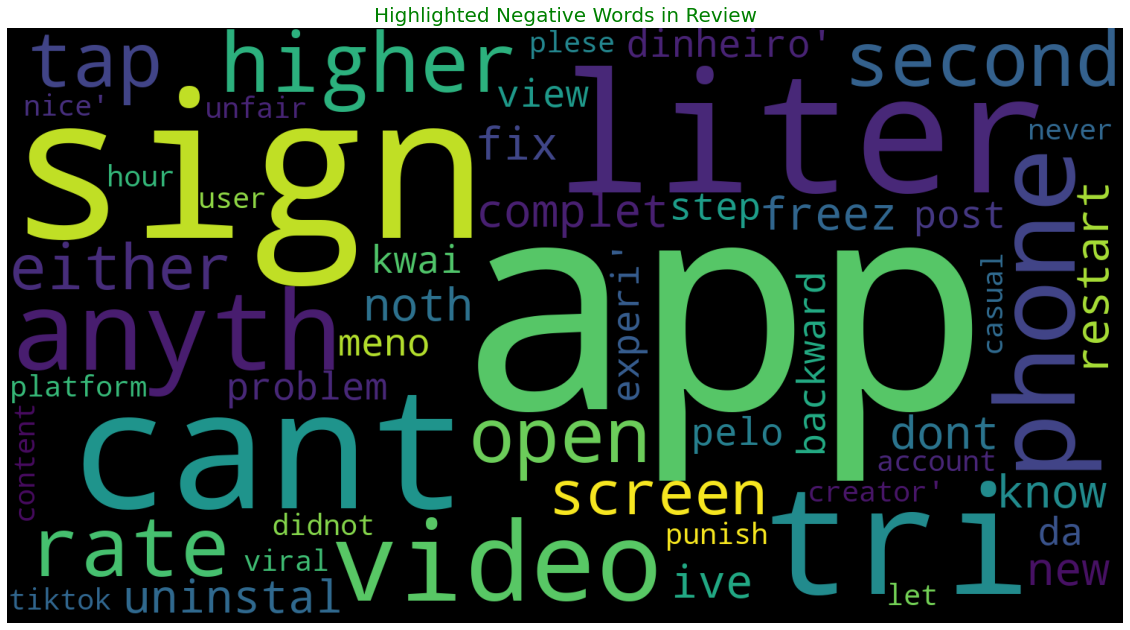

In [24]:
graph=data[data['Sentiment_class']=='negative']
review=graph['content'].values
word_cloud=WordCloud(max_words=50000, width=1500,height=800).generate_from_text(str(review))
plt.figure(figsize=(20,12))
plt.imshow(word_cloud)
plt.title("Highlighted Negative Words in Review", color='green', fontsize=20)
plt.axis('off');

## Build Differet Classification models to predict sentiment class

In [25]:
data['Sentiment_class'].replace({'positive':2,'neutral':1,'negative':0},inplace=True)

In [26]:
#Dependent & Independent features
x=data['content']
y=data['Sentiment_class']

In [27]:
#train test split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.25,random_state=0)

In [28]:
#Convert text to numeric using TD-IDF vectorizer
tf=TfidfVectorizer()
tf_fitted=tf.fit(x_train)
x_train_tf=tf_fitted.transform(x_train)
x_test_tf=tf_fitted.transform(x_test)

In [29]:
x_train_tf.shape

(345203, 80095)

## 1. Logistic Regression

In [32]:
lr=LogisticRegression()
lr.fit(x_train_tf,y_train)
print("Train Score : ", lr.score(x_train_tf, y_train))
print("Test Score : ", lr.score(x_test_tf, y_test))

Train Score :  0.8015544476728186
Test Score :  0.7970243681996733


Note:You can run any classification model if your Computer RAM is good. I just using Logistic Regression model here.

## 2. Decision Tree classifier

In [61]:
dt=DecisionTreeClassifier()
dt.fit(x_train_tf,y_train)
print("Train Score : ", dt.score(x_train_tf, y_train))
print("Test Score : ", dt.score(x_test_tf, y_test))

Train Score :  0.9175818286631344
Test Score :  0.7581603921159662


## 3. Random Forest classifier

In [ ]:
rf=RandomForestClassifier()
rf.fit(x_train_tf,y_train)
print("Train Score : ", rf.score(x_train_tf, y_train))
print("Test Score : ", rf.score(x_test_tf, y_test))

## 4. XGBoost classifier

In [ ]:
xg=XGBClassifier()
xg.fit(x_train_tf,y_train)
print("Train Score : ", xg.score(x_train_tf, y_train))
print("Test Score : ", xg.score(x_test_tf, y_test))

### Test the Model

In [34]:
content=['''avoid advertising in Tiktok they would reject your ad for any stupid reason without any further explanation.
of course they will charge you before they review your ad and after they reject it they will not refund you.
if you wish to advertise your business stay away from Tiktok''',
'''The fact that I have to post to view a friends post is stupid!!! Removing app from my phone because I’m so annoyed with that!!!
When that feature gets removed I’ll sign up again!!!!''',
'''They app is too sensitive to words and it’s very difficult to fully express yourself without running into difficulties.
Not my favorite social media app''',
'''Cringe everywhere, People lying to their viewers, strange videos and people begging for likes and followers and using people as clout.
Thankfully some videos are actually good and entertaining and a good way to get famous''',
'''Best app ever lol. Come on how can you hate on it!??''']

In [36]:
dd=pd.DataFrame(content, columns=['content'])
dd['content_clean']=dd['content'].apply(lambda x : clean(x))
dd1=tf_fitted.transform(dd['content_clean'])
lr.predict(dd1)

array([0, 0, 2, 2, 2], dtype=int64)

### Conclusion:
1. **Over 73% reviews are positive, 10% are neutral & 16% are negative reviews.**
2. **Created classification models, used "Logistic Regression" model to predict sentiment of tiktok user using Unseen Data.**